<div class="frontmatter text-center">
<h1> MATH5027 Scientific Python</h1>
<h3>Central European University, Fall 2017/2018</h3>
<h3>Instructor: Prof. Roberta Sinatra, TA: Johannes Wachs</h3>
inspired to a lecture of James Bagrow, http://bagrow.com.
</div>

### Today's plan:
- Intro to accessing a web API programmatically:
    - openexchangerates.org
    - we will use more of datetime and matplotlib 

# Accessing Web APIs

As a data-collection example, suppose we want to find out how currencies compare to one another over time. In other words, let's plot a time series of [exchange rates](http://en.wikipedia.org/wiki/Exchange_rate).

There's a nice, free website called https://openexchangerates.org. They provide a nice API to get exchange rate data. Let's use this.

**BTW**, API means "Application Programming Interface" and is a set of functions and procedures that allow the creation of applications which access the features or data of an operating system, application, or other service.

* You need to [register with them](https://openexchangerates.org/signup/free) to get an **APP ID**. This lets them track how often you call their website and block you if you do too much (this is known as rate limiting).

<img src="rate_limit.png" height="700" width="700">


The APP ID is a string of 32 characters. I've got mine saved by itself in a text file which the python will load:

In [1]:
app_id = open("C:/FOLDERS/CEU/Scientific Python/exchange_api_id.txt").read().strip()
app_id

'49ba211092674b0aa0e132642cc4f51b'

Now let's download something and see what we get. Their [docs](https://openexchangerates.org/documentation) help us see how to build a URL.

In [2]:
# from their docs:
# http://openexchangerates.org/api/latest.json?app_id=YOUR_APP_ID

# build a url from pieces:
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id  # "app_id" is the personal app id you get when register
URL = "%s/historical/2011-10-18.json?%s" % (base_url, id_str) # this format is specified at the end of the doc page

In [4]:
URL

'http://openexchangerates.org/api/historical/2011-10-18.json?app_id=49ba211092674b0aa0e132642cc4f51b'

OK, let's download the text of that "page" and see what we get.

In [27]:
import urllib.request
request = urllib.request.Request(URL)
result = urllib.request.urlopen(request)
text = result.read()

In [28]:
type(text)
# now print the beginning and ending of the text:
print(text[:1500])
print('\n')
print(text[-300:])

b'{\n  "disclaimer": "Usage subject to terms: https://openexchangerates.org/terms",\n  "license": "https://openexchangerates.org/license",\n  "timestamp": 1318953600,\n  "base": "USD",\n  "rates": {\n    "AED": 3.67285,\n    "AFN": 48.325965,\n    "ALL": 102.607855,\n    "AMD": 376.327731,\n    "ANG": 1.77665,\n    "AOA": 94.851761,\n    "ARS": 4.215038,\n    "AUD": 0.979142,\n    "AWG": 1.79025,\n    "AZN": 0.786155,\n    "BAM": 1.429934,\n    "BBD": 2,\n    "BDT": 75.987773,\n    "BGN": 1.430108,\n    "BHD": 0.37653,\n    "BIF": 1231.30548,\n    "BMD": 1,\n    "BND": 1.272581,\n    "BOB": 7.013496,\n    "BRL": 1.767354,\n    "BSD": 1,\n    "BTN": 49.334603,\n    "BWP": 7.340381,\n    "BYR": 4395.431805,\n    "BZD": 1.99315,\n    "CAD": 1.018634,\n    "CDF": 915.22783,\n    "CHF": 0.900405,\n    "CLF": 0.021176,\n    "CLP": 510.174179,\n    "CNY": 6.3813,\n    "COP": 1894.791035,\n    "CRC": 510.707928,\n    "CVE": 80.624452,\n    "CZK": 18.206884,\n    "DJF": 177.721,\n    "DKK": 5.4

OK, this is nice we've got some data in a somewhat human-readable format. If we could print all the ``\n`` as new lines, we would see something like:

<img src="json_example.png">

This format is known as [JSON (Javascript Object Notation)](http://en.wikipedia.org/wiki/JSON). It should look familiar to you because it's almost exactly how we type a dictionary into python.

This data format has become **very popular recently** because it's not only how you write a python dict but also a **Javascript object**. This means a web browser can trivially parse a JSON string. Other formats, like XML, require real parser code.

#### JSON in Python

Let's see how to use JSON data in python then we'll return to the exchange data.

In [5]:
import json

D = {"name" : "Alice"}
json_str = json.dumps(D) # dumps -> dump string
print(json_str)
print(type(json_str))


{"name": "Alice"}
<class 'str'>


JSON can actually represent more than dicts, like a list of dicts:

In [7]:
# note the single- vs. double-quotes...
string = '[ {"name":"Bob","age":28}, {"name":"Alice","age":23} ]'
print(type(string))
D = json.loads(string)
print(D)
print(type(D))
print(D[0]["name"], D[0]["age"])
print(type(D[0]))

<class 'str'>
[{'name': 'Bob', 'age': 28}, {'name': 'Alice', 'age': 23}]
<class 'list'>
Bob 28
<class 'dict'>


### Quick exercise 
In Class 4 you had a dictionary looking like: <br>

{'id1':   
   {'name': ['Sara'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id2':   
  {'name': ['David'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id3':   
    {'name': ['Sara'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id4':   
   {'name': ['Surya'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
}


Put all this text in a file, read it at one (not line by line) as a string, and then convert it to a dictionary by using the module json.
***

In [3]:
d={'id1':   
   {'name': ['Sara'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id2':   
  {'name': ['David'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id3':   
    {'name': ['Sara'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id4':   
   {'name': ['Surya'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
}


In [13]:
type(d)

dict

In [14]:
list(d.values())[0]

{'class': ['V'],
 'name': ['Sara'],
 'subject_integration': ['english, math, science']}

In [16]:
list(list(d.values())[0].keys())

['name', 'class', 'subject_integration']

So you can take your dictionary and dump it with the module ``json``. **Dumps: object => string**

In [6]:
dump_jason=json.dumps(d)

In [7]:
print(dump_jason)

{"id1": {"name": ["Sara"], "class": ["V"], "subject_integration": ["english, math, science"]}, "id2": {"name": ["David"], "class": ["V"], "subject_integration": ["english, math, science"]}, "id3": {"name": ["Sara"], "class": ["V"], "subject_integration": ["english, math, science"]}, "id4": {"name": ["Surya"], "class": ["V"], "subject_integration": ["english, math, science"]}}


This way you will get a string

In [21]:
type(dump_jason)

str

You can put this string in a file, to share data with someone else, or to store it, then load it again through the ``json`` module. **Loads: string => object.**

In [24]:
load_jason=json.loads(dump_jason) ## Here we got a dictionary object.

In [25]:
list(load_jason.values())

[{'class': ['V'],
  'name': ['Sara'],
  'subject_integration': ['english, math, science']},
 {'class': ['V'],
  'name': ['David'],
  'subject_integration': ['english, math, science']},
 {'class': ['V'],
  'name': ['Sara'],
  'subject_integration': ['english, math, science']},
 {'class': ['V'],
  'name': ['Surya'],
  'subject_integration': ['english, math, science']}]

**Great!** This means we can take the text from that website and run it through json.loads and we have a nice accessible python dict:

In [29]:
data = json.loads(text) # This comes from our API, remember? Now we are creating an object with json.loads.
print(type(data))
print(list(data.keys()))

<class 'dict'>
['disclaimer', 'license', 'timestamp', 'base', 'rates']


'rates' value is a dictionary of ticker:rate pairs.

Sweet. Now we see there's a timestamp key. What does it give us?

In [30]:
print(data["timestamp"])

1318953600


Is that a UNIX timestamp? Yup! If you don't remember what this is, take the notebook of class 5, and look at the epoch paragraph.

This format is so common that `datetime` has a builtin method to deal with it, `fromtimestamp`:

In [34]:
import datetime
t = datetime.datetime.fromtimestamp(data["timestamp"])

print(t)
print(type(t)) # this is datetime, not a timedelta. Do you remember the difference?

2011-10-18 18:00:00
<class 'datetime.datetime'>


Our original URL had `historical/2011-10-18.json` in it, so that timestamp makes perfect sense. See, timestamps!!

There are also the `base` and `rates` keys. Those are the actual exchange rate data:

In [19]:
print(data["base"])
print(type(data["rates"]))
print(list(data["rates"].keys())[:5]) # print first five keys

USD
<class 'dict'>
['AED', 'AFN', 'ALL', 'AMD', 'ANG']


`base` tells us what currency the exchange rate is relative to. `rates` is another dict, keyed by three-letter currency name.

In [32]:
print(data["rates"]["AUD"])

0.979142


Makes sense, the conversion for USD should always be 1 since the base was USD. Let's check if the exchange rate with the hungarian forint is present, and let's have a look at it:

In [21]:
try: 
    print('Hungarian Forint included. Rate:', data["rates"]["HUF"])
except:
    print('currency not included')

Hungarian Forint included. Rate: 217.686711


Now, having a `data` dict like this may seem a little verbose compared to a table or CSV file. A CSV file for exchange rates makes a lot of sense but many data do not fit into a nice regular form like that. Send JSON "over the wire" and using dictionary keys makes it easy for us to keep track of what number correspond to what unit of measurement.

***
### Quick exercise
How many different currencies are there in the json files? How can you check it quickly?
***

In [33]:
len(data["rates"])

157

## Exercise: Putting it all together

Create a for loop over all years and months between 2010 and 2011, in each loop download the json exchange data for each month, and save it to a big dictionary called ``time2data``, where keys are (year,month) tuples.

*Important*: It should take only a few seconds. If you are not sure your code works, test only with a few months, as you can reach the rate limit. 

In [34]:
import urllib.request
time2data = {}


for i in range(1,3):
    if i < 10:
        datum = "%s/historical/2011-" + str(0) + str(i) + "-18.json?%s"
    else:
        datum = "%s/historical/2011-" + str(i) + "-18.json?%s"
    URL = datum % (base_url, id_str)
    request = urllib.request.Request(URL)
    result = urllib.request.urlopen(request)
    text = result.read()
    text_to_dic = json.loads(text)
    timestamp = text_to_dic["timestamp"]
    key = (int(datetime.datetime.fromtimestamp(timestamp).strftime("%Y")),int(datetime.datetime.fromtimestamp(timestamp).strftime("%m")))
    time2data[key] = text_to_dic["rates"]

time2data
    

{(2011, 1): {'AED': 3.67275,
  'AFN': 43.027437,
  'ALL': 103.765685,
  'AMD': 365.859749,
  'ANG': 1.79075,
  'AOA': 92.72503,
  'ARS': 3.979115,
  'AUD': 1.002376,
  'AWG': 1.79025,
  'AZN': 0.796942,
  'BAM': 1.463095,
  'BBD': 2,
  'BDT': 71.107655,
  'BGN': 1.462729,
  'BHD': 0.3763,
  'BIF': 1132.575628,
  'BMD': 1,
  'BND': 1.286746,
  'BOB': 6.960751,
  'BRL': 1.673964,
  'BSD': 1,
  'BTN': 45.429949,
  'BWP': 6.618847,
  'BYR': 3013.162228,
  'BZD': 1.9875,
  'CAD': 0.989556,
  'CDF': 907.422246,
  'CHF': 0.961541,
  'CLP': 490.625691,
  'CNY': 6.583635,
  'COP': 1872.924821,
  'CRC': 500.558462,
  'CVE': 82.46354,
  'CZK': 18.159201,
  'DJF': 177.721,
  'DKK': 5.5674,
  'DOP': 37.267738,
  'DZD': 72.760297,
  'EGP': 5.823868,
  'ETB': 12.728683,
  'EUR': 0.747027,
  'FJD': 1.840637,
  'FKP': 0.625731,
  'GBP': 0.625607,
  'GEL': 1.808171,
  'GHS': 1.489792,
  'GIP': 0.624972,
  'GMD': 27.397578,
  'GNF': 7230.603317,
  'GTQ': 7.968284,
  'GYD': 203.13098,
  'HKD': 7.776999,
 

In [36]:
time2data[(2011, 2)]["EUR"]

0.731365

I assume you have your time2data. I got it already :) Now we can look at some data:

In [38]:
list_ex = []
list_ts = []

for y_m in sorted(time2data.keys()): # sorted() makes sure we loop
                                     # over the dict in time order
    list_ts.append(y_m)
    
    data = time2data[y_m]
    #exch_eur = data["rates"]["HUF"]
    exch_eur = data["HUF"]
    list_ex.append(exch_eur)

This gives us a list of (year,month) tuples and a list of HUF->USD exchange rates (since `base` is always USD).

We can just drop the time information, but `matplotlib` gives us a nice tool to work with python datetime. So let's convert our `(1999,3)` tuples into `datetime`s.

In [25]:
list_dt = []
for yr,mo in list_ts:
    dt = datetime.datetime(year=yr,month=mo,day=1)
    list_dt.append(dt)

In [26]:
list_dt

[datetime.datetime(2010, 1, 1, 0, 0),
 datetime.datetime(2010, 2, 1, 0, 0),
 datetime.datetime(2010, 3, 1, 0, 0),
 datetime.datetime(2010, 4, 1, 0, 0),
 datetime.datetime(2010, 5, 1, 0, 0),
 datetime.datetime(2010, 6, 1, 0, 0),
 datetime.datetime(2010, 7, 1, 0, 0),
 datetime.datetime(2010, 8, 1, 0, 0),
 datetime.datetime(2010, 9, 1, 0, 0),
 datetime.datetime(2010, 10, 1, 0, 0),
 datetime.datetime(2010, 11, 1, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 2, 1, 0, 0),
 datetime.datetime(2011, 3, 1, 0, 0),
 datetime.datetime(2011, 4, 1, 0, 0),
 datetime.datetime(2011, 5, 1, 0, 0),
 datetime.datetime(2011, 6, 1, 0, 0),
 datetime.datetime(2011, 7, 1, 0, 0),
 datetime.datetime(2011, 8, 1, 0, 0),
 datetime.datetime(2011, 9, 1, 0, 0),
 datetime.datetime(2011, 10, 1, 0, 0),
 datetime.datetime(2011, 11, 1, 0, 0)]

***
### Quick exercise
Create list_dt with a list comprehension
***

In [41]:
list_dt = [datetime.datetime(year=yr,month=mo,day=1) for yr,mo in list_ts]

Now we can use matplotlibs `date2num` tool:

In [27]:
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
dates = matplotlib.dates.date2num(list_dt)

And now make a nice plot (hope it looks good!)

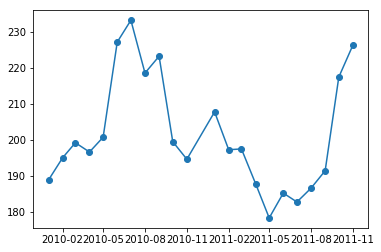

In [28]:
plt.plot_date(dates, list_ex, "o-") # note plot_date !
plt.show()

Let's annotate the plot a little bit to make it easier to read. Like most graphical toolkits, `matplotlib` is very powerful but can be hard to explore. Have a look at the matplotlib notebook to figure out some of these tweaks!

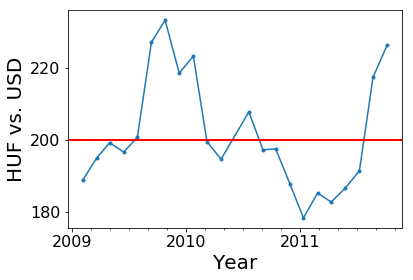

In [29]:
fig, ax = plt.subplots()
plt.plot_date(dates, list_ex, ".-")

# add horizontal bar denoting 200 HUF = USD:
plt.axhline(200, linewidth=2, color='r')

# clean it up:
plt.xlabel("Year",        fontsize=20)
plt.ylabel("HUF vs. USD", fontsize=20)
plt.tick_params(labelsize=16)
max_xticks = 3
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
min_locator=matplotlib.ticker.AutoMinorLocator(6)
ax.xaxis.set_minor_locator(min_locator)

We are building up the ability to do some **cool stuff**! :)

## Exercise

* Register for the API, and create your own app_id key
* Get the exchange rate HUF vs USD from 2000 to 2010, but every six months. Plot it on a plot.
* Get the exchange rate EUR vs USD from 2000 to 2010 monthly (careful with API rate limits! Test with, say, one year of data, and then request the rest). Plot it.
* Combine the two previous trends in one plot: put EUR vs USD in the main plot and HUF vs USD in an insert. Use different colors, and different symbols.
* Make nice plots: add a title, a legend. For example, use bigger round ('o') markers with bigger size (command MarkerSize), make the edge color (MarkerEdgecolor) light grey, the filling (MarkerFaceColor) red. Check a few examples in the matplotlib notebook
* Put HUFvsUSD and EURvsUSD in the same plot with two y-axis. The command is ```twinx``` and you can look up an example in the matplotlib notebook.
* Create a function that given a list and a window, return the [ moving average](https://en.wikipedia.org/wiki/Moving_average) with that window. Apply it to the EUR vs USD rate exchange and...
* ...plot it, but removing the top and right axes (command spine, look the matplotlib example)

Note: we will see commands to computer the moving average with one line. Here we want to see if you are able to write code to compute it by yourself. 


In [44]:
import urllib.request
time2data = {}

for h in range(2000,2005):
    for i in range(1,13):
        if i < 10:
            datum = "%s/historical/" + str(h) + "-" + str(0) + str(i) + "-18.json?%s"
        else:
            datum = "%s/historical/" + str(h) + "-" + str(i) + "-18.json?%s"
        URL = datum % (base_url, id_str)
        request = urllib.request.Request(URL)
        result = urllib.request.urlopen(request)
        text = result.read()
        text_to_dic = json.loads(text)
        timestamp = text_to_dic["timestamp"]
        key = (int(datetime.datetime.fromtimestamp(timestamp).strftime("%Y")),int(datetime.datetime.fromtimestamp(timestamp).strftime("%m")))
        time2data[key] = text_to_dic["rates"]

In [48]:
list_ex_EURUSD = []
list_ex_USDHUF = []
list_ts = []

for y_m in sorted(time2data.keys()): # sorted() makes sure we loop
                                     # over the dict in time order
    list_ts.append(y_m)
    
    data = time2data[y_m]
    exch_eur = 1 / data["EUR"]
    list_ex_EURUSD.append(exch_eur)
    exch_huf = data["HUF"]
    list_ex_USDHUF.append(exch_huf)


In [67]:
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import *

In [52]:
list_dt = [datetime.datetime(year=yr,month=mo,day=18) for yr,mo in list_ts]
dates = matplotlib.dates.date2num(list_dt)

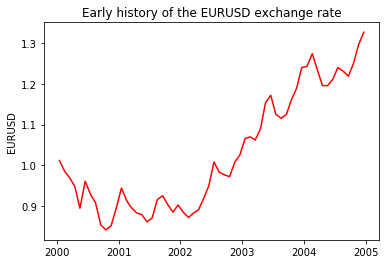

In [112]:
plt.plot_date(dates, list_ex_EURUSD, "r-")
plt.ylabel("EURUSD")
plt.title("Early history of the EURUSD exchange rate", fontsize = 12)
show()
          

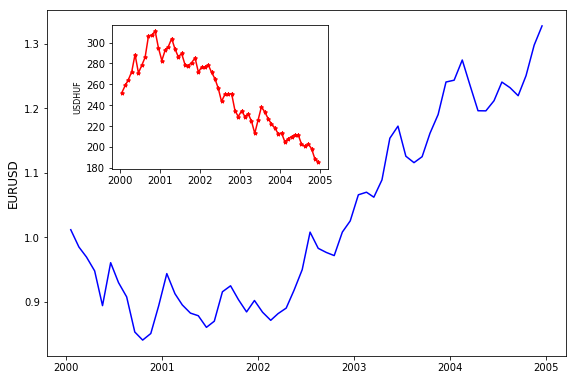

In [109]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 1.2, 1.2])
axes2 = fig.add_axes([0.25, 0.75, 0.5, 0.5])

axes1.plot(dates, list_ex_EURUSD,"b")
axes1.set_ylabel("EURUSD", fontsize = 12)
axes1.xaxis_date()

axes2.plot(dates, list_ex_USDHUF, "r*-", markersize = 4)
axes2.set_ylabel("USDHUF", fontsize = 8)

axes2.xaxis_date()
show()


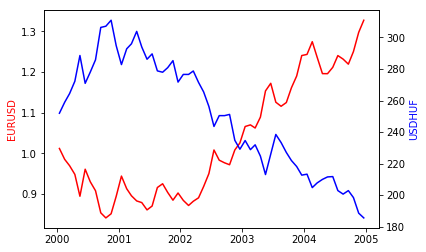

In [117]:
fig, ax1 = plt.subplots()

ax1.plot(dates, list_ex_EURUSD, "r-")
ax1.xaxis_date()
ax1.set_ylabel("EURUSD", color = "r")

ax2 = ax1.twinx()
ax2.plot(dates, list_ex_USDHUF, "b-")
ax2.set_ylabel("USDHUF", color = "b")

show()

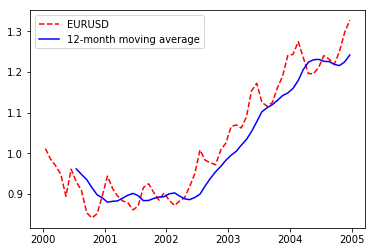

In [174]:
def movingavg(inputlist, window_size):
    outputlist = []
    for i in range(0, len(inputlist)):
        if i < window_size:
            outputlist.append(float("nan"))
        else:
            outputlist.append(sum(inputlist[i-window_size:i])/window_size)
    return outputlist

avg_exchange_rate = movingavg(list_ex_EURUSD, 6)

fig, ax1 = plt.subplots()


plt.plot(dates, list_ex_EURUSD, 'r--', dates, avg_exchange_rate, 'b-')
ax1.xaxis_date()
ax1.legend(["EURUSD", "12-month moving average"])


show()

## Optional: Working with Twitter APIs
*(by [ Milan Janosov](http://www.milanjanosov.com/), Network Science PhD student)*

Twitter provides two official channels to access 1% of their data for free: the Search API and the Stream API. While on the Stream API you can follow the tweets real time, the Search API allows you to retrieve tweets back to one week. Here we focus on the latter by writing a script which downloads all the available tweets containing a keyword or a set of keywords. We will do so by using the module ```TwitterSearch```. It is important to note that there are several other popular Twitter API wrappers written in Python, such as ```Twython``` or ```Twypy```.

First, you will need to install TwitterSearch. FOr example, in unix this can be done with the command ``pip install TwitterSearch``, or ``!pip install TwitterSearch`` from the notebook. In windows, the easiest thing is to use the Anaconda interface.

In [30]:
from TwitterSearch import *

In [31]:
def download_tweets(keywords, credentials):


    for keyword in keywords:
 
        # An object is an advanced data struture which has its own fields (containers)
        # and certain built-in functions to manipulate those fields. An important
        # programming paradigm, the Object Oriented Paradigm introduced this concept. 
        print ('Creating TwitterSearch object... this might take a minute or two.')
        tso = TwitterSearchOrder()      # create a TwitterSearchOrder object
        tso.set_keywords([keyword])     # let's define all words we would like to have a look for
        tso.set_language('en')          # we want to see English tweets only. If you want, say, german tweets set to de
        tso.set_include_entities(False) # and don't give us all those entity information
        
        # You need to be authentica
        ts = TwitterSearch(consumer_key        = credentials['consumer_key'       ], 
                           consumer_secret     = credentials['consumer_secret'    ], 
                           access_token        = credentials['access_token'       ], 
                           access_token_secret = credentials['access_token_secret']  )



        print ('Downloading tweets about ' + keyword + ', be patience...')
        tweets = []
        
        # This loop iterates over the TwitterSearchOrder results: a set of tweets,
        # which has certain fields, such as 'user' or 'geo'. (Note: only 7% of the tweets are geotagged)
        for tweet in ts.search_tweets_iterable(tso):
            
            user  = tweet['user']['screen_name'].encode('utf-8')
            text  = tweet['text'].encode('utf-8')
            timet = tweet['created_at']
            geo   = tweet['geo'] 
            retw  = tweet['retweet_count']
            favs  = tweet['favorite_count']
            
            tweet_data = str(keyword) + '\t'+str(user) + '\t'+str(text) + '\t'+str(geo) + '\t'+str(retw) + '\t' + str(timet) + '\t' + str(favs) 
            tweets.append(tweet_data)     
                 
    return tweets

Prepare your phone and sign up for twitter developer credentials here: https://apps.twitter.com/app/new   and replace the ---s. With the piece of code below, I am importing my credentials from a file ```twitter_credentials.txt```. The credentials are written in json format:

```credentials = {'consumer_key'        : 'XXXXXXXXXXXXX',
'consumer_secret'     : 'XXXXXXXXXXXXXXXXXXXXX',
'access_token'        : 'XXXXXXXXXXXXXXXXXXXXXXXXXX',
'access_token_secret' : 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'}```

where XXXX... are strings of letters and numbers. Write your credentials also in a file to use the piece of code below.

In [32]:
import json
fin=open('personal/twitter_credentials.txt')
credentials=json.loads(fin.read())
fin.close()


Give some keywords you are interested in: the script will download all the tweets containing these expressions the result is a list of tweets where is tweet is a string, however, it can be split by tabs to the following fields: keyword, user, text, geolocation, retweet count, tweet time, number of favs

In [33]:
keywords = ['#istandwithceu']
tweets = download_tweets(keywords, credentials)

print (tweets)

Creating TwitterSearch object... this might take a minute or two.
['#istandwithceu\tb\'Shugars\'\tb"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"\tNone\t9\tTue Oct 10 10:50:23 +0000 2017\t0', '#istandwithceu\tb\'martapardavi\'\tb"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"\tNone\t9\tTue Oct 10 09:57:10 +0000 2017\t0', '#istandwithceu\tb\'zoowalk\'\tb"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"\tNone\t9\tTue Oct 10 09:31:09 +0000 2017\t0', '#istandwithceu\tb\'mcg_fiona\'\tb"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"\tNone\t9\tTue Oct 10 09:17:2

You can later print them, make an analysis or do whatever you want.

In [34]:
for tweet in tweets:
    print(tweet.split('\t'))

['#istandwithceu', "b'Shugars'", 'b"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"', 'None', '9', 'Tue Oct 10 10:50:23 +0000 2017', '0']
['#istandwithceu', "b'martapardavi'", 'b"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"', 'None', '9', 'Tue Oct 10 09:57:10 +0000 2017', '0']
['#istandwithceu', "b'zoowalk'", 'b"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"', 'None', '9', 'Tue Oct 10 09:31:09 +0000 2017', '0']
['#istandwithceu', "b'mcg_fiona'", 'b"RT @ceuhungary: CEU Welcomes German Chancellor Spokesperson\'s Call for Signing of NY-Hungary Agreement #istandwithCEU https://t.co/nTj7BgiM\\xe2\\x80\\xa6"', 'None', '9', 'Tue Oct 10 09:17:23 +0000 2017', '0']
['#is

## Exercise
In each line print above, there is a lot of information, not just the text of the tweet. Can you identify the different pieces of information? 